In [1]:
import numpy as np
from features_ext import *
import sys
sys.path.insert(0, '../scripts') 

In [33]:
#define 
n_variables = 12
degree = 2
features_per_group =  20

#generate the exponents
k_exponents = exponents(n_variables, degree, features_per_group, non_interaction_first=True)

#generate the sample dataset
x_train = np.random.randn(100, n_variables)
y_train = np.random.choice([0., 1.], size = (100, ))

#add the non-interacting features
new_features = gen_new_features(x_train, k_exponents[0])
expanded_train = np.append(x_train, new_features, axis = 1 )

#add all other features
for n, e in enumerate(k_exponents[1:]):
    new_features = gen_new_features(x_train, e)
    expanded_train = np.append(expanded_train, new_features, axis = 1 )

#print the shape of the expanded dataset
print('Expanded shape: ', expanded_train.shape, 'number of monomials in degree 2:\t', int(number_monomials(n_variables = n_variables, degree = degree)))

Expanded shape:  (100, 90) number of monomials in degree 2:	 78


In [45]:
k_exponents[0]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

Feature selected =  0


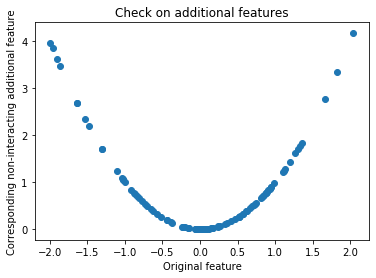

In [60]:
#Additional: check plotting the dataset
import matplotlib.pyplot as plt
select = np.random.randint(low = 0, high = n_variables-1)
print('Feature selected = ', select)
plt.scatter(expanded_train[:, select], expanded_train[:, n_variables-1 + (n_variables -select)]) #due to the weird correspondence in the exponents (see above)
plt.xlabel('Original feature')
plt.ylabel('Corresponding non-interacting additional feature')
_ = plt.title('Check on additional features')

In [3]:
#generate the sample dataset
x_train = np.random.randn(100, 12)
y_train = np.random.choice([0., 1.], size = (100, ))

In [59]:
n_features = 5
n_rows = 20
def selec_rows_features(x, degree, n_features, n_rows):
    #select the number of features/rows
    subset_of_features = x[:, np.random.permutation(x.shape[1])[:n_features] ]
    print(subset_of_features.shape)
    subset_of_rows = subset_of_features[ np.random.permutation(subset_of_features.shape[0])[:n_rows] ]
    print(subset_of_rows.shape)

    #build the polynomial to a given degree w.o interacting terms
    expanded = build_poly_standard(subset_of_rows, degree)

    #add the interaction terms
    k_exponents = exponents(subset_of_rows.shape[1], 2, int(number_monomials(subset_of_rows.shape[0], 2)), non_interaction_first=True)
    interactions =  gen_new_features(subset_of_rows, k_exponents[1])
    expanded  = np.concatenate((expanded, interactions), axis = 1)

    return expanded

In [60]:
out = selec_rows_features(x_train, 3, 5, 50 )
out.shape

(100, 5)
(50, 5)


(50, 26)

In [52]:
(50,5*3+1+ 10)

(50, 26)

In [37]:
from preprocessing import build_poly_standard

x_train.shape, expanded.shape

interactions =  gen_new_features(x_train, k_exponents[1])

((100, 12), (100, 25))

In [50]:
number_monomials(5, 2) - 5

10.0

In [43]:
k_exponents = exponents(x_train.shape[1], 2, int(number_monomials(x_train.shape[0], 2)), non_interaction_first=True)
interactions =  gen_new_features(x_train, k_exponents[1])
interactions.shape

(100, 66)

In [33]:
sub_dataset = selec_rows_features(x_train, n_features, n_rows).shape
degree = 2



(100, 5)
(20, 5)


(20, 5)

In [23]:
#add the non-interacting features
degree = 2
b
k_exponents[2]

array([[0, 0, 1, 1, 0],
       [1, 1, 0, 0, 0],
       [0, 1, 0, 1, 0],
       [0, 1, 0, 0, 1],
       [1, 0, 0, 0, 1]])

In [24]:
new_features = gen_new_features(subset_of_rows, k_exponents[0])
expanded_train = np.append(subset_of_rows, new_features, axis = 1 )

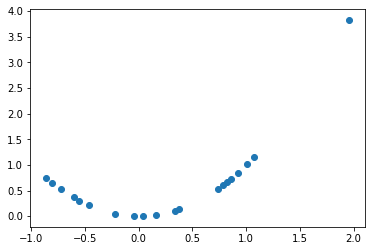

In [29]:
import matplotlib.pyplot as plt 
plt.scatter(expanded_train[:, 0], expanded_train[:, 9])